In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl
# Set the default color cycle
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["r", "k", "c"]) 

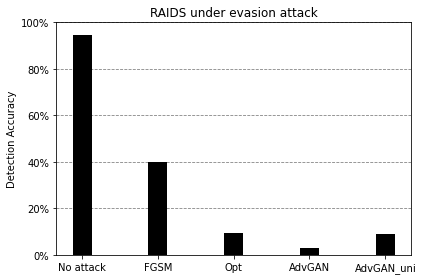

In [10]:
# Attack on RAIDS: Reducing Detection Rate using evade attack
# labels = ["No attack", "FGSM", "Opt", "OptU", "advGAN","advGANU"]
# evade = [0.9477523659305994,0.3980678233438486,0.09207413249211356,0.9982255520504731,0.028391167192429023,0.09069400630914827]
labels = ["No attack","FGSM", "Opt", "AdvGAN","AdvGAN_uni"]
evade = [0.9477523659305994,0.3980678233438486,0.09207413249211356,0.028391167192429023,0.09069400630914827]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x , evade, width, label="evade", color="k")

ax.set_ylabel("Intrusion Detection Accuracy")
ax.set_title("RAIDS under evasion attack")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.set_ylim([0, 1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))

fig.tight_layout()
fig.set_size_inches(6, 4)
plt.show()
fig.savefig("report/raids_evasion.pdf")

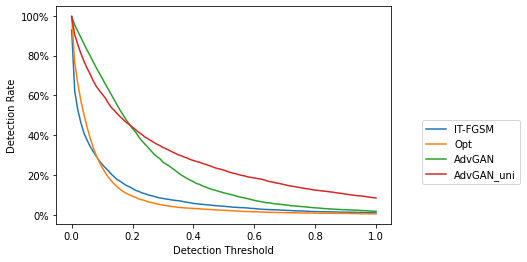

In [3]:
# Feature Squeezing - bit reduction #0.3
fig, ax = plt.subplots()
ax.set_ylabel("Detection Rate")
ax.set_xlabel("Detection Threshold")
# ax.set_title("Feature Squeezing (Bit Reduction)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
attack_names = ["fgsm","opt", "advGAN", "advGANU"]
# attack_names = ["fgsm", "opt", "OptU", "advGAN", "advGANU"]
for i in range(len(attack_names)):
    df = pd.read_csv("./defences/results/udacity_none_" + attack_names[i] + ".csv")
    df = df.loc[df['threshold'] <= 1.0]
    attack_label = ["IT-FGSM","Opt", "AdvGAN", "AdvGAN_uni"]
    plt.plot(df['threshold'],df['adv_detected_bit_rate'], label = attack_label[i])
# plt.plot(df['threshold'],df['orig_detected_bit_rate'], label = "No attack", color="k")
plt.legend(loc="best", bbox_to_anchor=(1.0, 0.2))
plt.show()
fig.savefig("report/RAIDS_feature_squeezing_bit.pdf", bbox_inches='tight')

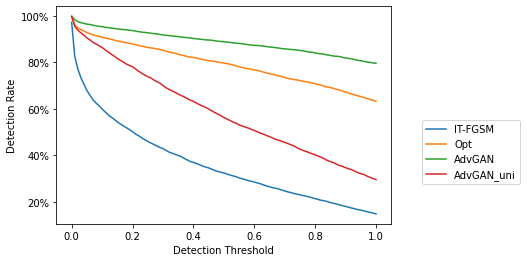

In [4]:
# Feature Squeezing - median filter
fig, ax = plt.subplots()
ax.set_ylabel("Detection Rate")
ax.set_xlabel("Detection Threshold")
# ax.set_title("Feature Squeezing (Median Filter)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
attack_names = ["fgsm","opt", "advGAN", "advGANU"]
# attack_names = ["fgsm", "opt", "OptU", "advGAN", "advGANU"]
for i in range(len(attack_names)):
    df = pd.read_csv("./defences/results/udacity_none_" + attack_names[i] + ".csv")
    df = df.loc[df['threshold'] <= 1.0]
    attack_label = ["IT-FGSM","Opt", "AdvGAN", "AdvGAN_uni"]
    plt.plot(df['threshold'],df['adv_detected_blur_rate'], label = attack_label[i])
# plt.plot(df['threshold'],df['orig_detected_bit_rate'], label = "No attack", color="k")
plt.legend(loc="best", bbox_to_anchor=(1.4, 0.5))
plt.show()
fig.savefig("report/RAIDS_feature_squeezing_blur.pdf", bbox_inches='tight')

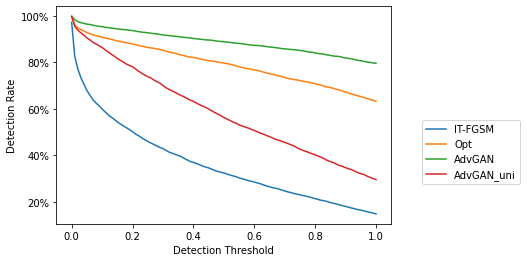

In [5]:
# Feature Squeezing - median filter
fig, ax = plt.subplots()
ax.set_ylabel("Detection Rate")
ax.set_xlabel("Detection Threshold")
# ax.set_title("Feature Squeezing (Bit Reduction & Median Filter)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
attack_names = ["fgsm","opt", "advGAN", "advGANU"]
# attack_names = ["fgsm", "opt", "OptU", "advGAN", "advGANU"]
for i in range(len(attack_names)):
    df = pd.read_csv("./defences/results/udacity_none_" + attack_names[i] + ".csv")
    df = df.loc[df['threshold'] <= 1.0]
    attack_label = ["IT-FGSM","Opt", "AdvGAN", "AdvGAN_uni"]
    plt.plot(df['threshold'],df['adv_detected_blur_rate'], label = attack_label[i])
# plt.plot(df['threshold'],df['orig_detected_bit_rate'], label = "No attack", color="k")
plt.legend(loc="best", bbox_to_anchor=(1.4, 0.5))
plt.show()
fig.savefig("report/RAIDS_feature_squeezing_both.pdf", bbox_inches='tight')

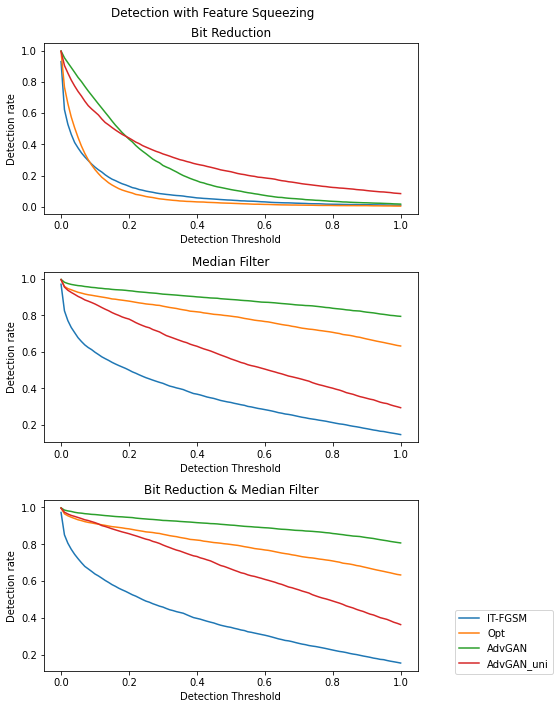

In [6]:
attack_names = ["fgsm", "opt", "advGAN", "advGANU"]
attack_label = ["IT-FGSM","Opt", "AdvGAN", "AdvGAN_uni"]
fig, (ax1, ax2,ax3) = plt.subplots(3)

fig.set_size_inches(6, 10)
fig.suptitle('Detection with Feature Squeezing')

ax1.set_title("Bit Reduction")
ax1.set_xlabel('Detection Threshold')
ax1.set_ylabel('Detection rate')
for i in range(len(attack_names)):
    df = pd.read_csv("./defences/results/udacity_none_" + attack_names[i] + ".csv")
    df = df.loc[df['threshold'] <= 1.0]
    ax1.plot(df['threshold'],df['adv_detected_bit_rate'], label = attack_label[i])
# ax1.plot(df['threshold'],df['orig_detected_bit_rate'], label = "No attack", color="k")

ax2.set_title("Median Filter")
ax2.set_xlabel('Detection Threshold')
ax2.set_ylabel('Detection rate')
for i in range(len(attack_names)):
    df = pd.read_csv("./defences/results/udacity_none_" + attack_names[i] + ".csv")
    df = df.loc[df['threshold'] <= 1.0]
    ax2.plot(df['threshold'],df['adv_detected_blur_rate'], label = attack_label[i])
# ax2.plot(df['threshold'],df['orig_detected_blur_rate'], label = "No attack", color="k")

ax3.set_title("Bit Reduction & Median Filter")
ax3.set_xlabel('Detection Threshold')
ax3.set_ylabel('Detection rate')
for i in range(len(attack_names)):
    df = pd.read_csv("./defences/results/udacity_none_" + attack_names[i] + ".csv")
    df = df.loc[df['threshold'] <= 1.0]
    ax3.plot(df['threshold'],df['adv_detected_both_rate'], label = attack_label[i])
# ax3.plot(df['threshold'],df['orig_detected_both_rate'], label = "No attack", color="k")

handles, labels = ax3.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.3, 0.15))

fig.tight_layout()
fig.savefig("report/RAIDS_feature_squezzing.pdf", bbox_inches='tight')

### feature squezzing on 30% dataset

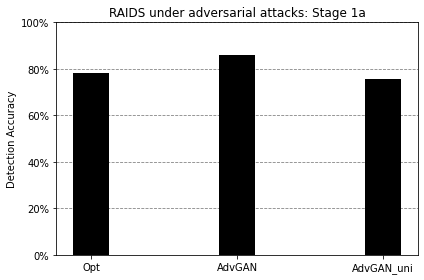

In [13]:
# Attack on RAIDS: Detection Rate on 30% perturbed image attack
# labels = ["FGSM", "Opt", "OptU", "advGAN","advGANU"]
# evade = [0.706196792714314,0.782815284102158,0.7036230449415958,0.8586418530983964,0.7556919421896654]
labels = ["Opt", "AdvGAN","AdvGAN_uni"]
evade = [0.783409225895862,0.859037814294199,0.7556919421896654]
# threshold: 0.48, 0.98
# filters: both, both, 
0.859037814

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x , evade, width, label="evade", color="k")

ax.set_ylabel("Detection Accuracy")
ax.set_title("RAIDS under adversarial attacks: Stage 1a")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.set_ylim([0, 1])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

fig.tight_layout()
fig.set_size_inches(6, 4)
plt.show()
# fig.savefig("report/raids_evasion.pdf")

### final results

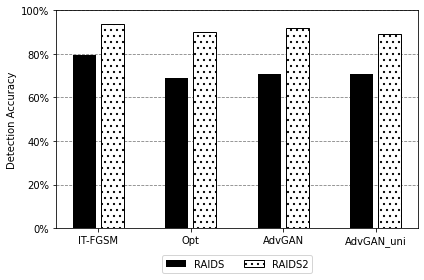

In [14]:
# ~~~~~~~~~~~~~~~~Overall_Accuracy~~~~~~~~~~~~~~~~
labels = ["IT-FGSM", "Opt", "AdvGAN","AdvGAN_uni"]
PAID = [0.9392199564442685,0.9004157592555929,0.9188279548604237, 0.8899227875668184]
RAIDS = [0.7939021975846368,0.6905563254801029,0.7097604434765393,0.7058008315185111]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.15, RAIDS, width, label="RAIDS", color="k")
rects3 = ax.bar(x + 0.15, RAIDS2, width, label="RAIDS2", color="w",edgecolor="black",hatch="..")

ax.set_ylabel("Detection Accuracy")
# ax.set_title("RAIDS and RAIDS2 under evasion attack")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
ax.set_ylim([0, 1])
fig.tight_layout()
fig.set_size_inches(6, 4)
plt.show()
fig.savefig("report/RAIDS2_evasion.pdf")

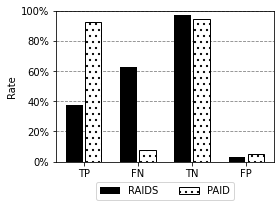

In [14]:
# FGSM
# TP, FN,TN,FP
labels = ["TP","FN","TN","FP"]
RAIDS = [0.3727454909819639,0.627254509018036,0.9712999437253799,0.028700056274620148]
PAID = [0.9231796927187709,0.07682030728122913,0.9459763646595385,0.05402363534046145]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="k")
rects2 = ax.bar(x + width / 2, PAID, (width - 0.05), label="PAID", color="white", hatch="..", edgecolor="black")

ax.set_ylabel("Rate")
# ax.set_title("Evasion attack (FGSM)")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
ax.set_ylim([0, 1])
fig.set_size_inches(4, 3)
fig.tight_layout()
plt.show()
fig.savefig("report/RAIDS2_evasion_fgsm.pdf")

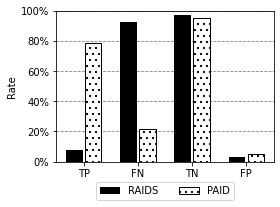

In [18]:
# Opt
# TP, FN,TN,FP
labels = ["TP","FN","TN","FP"]
RAIDS = [0.07548430193720775,0.9245156980627922,0.9712999437253799,0.028700056274620148]
PAID = [0.7835671342685371,0.21643286573146292,0.949634214969049,0.050365785030951044]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="k")
rects2 = ax.bar(x + width / 2, PAID, (width - 0.05), label="PAID", color="white", hatch="..", edgecolor="black")

ax.set_ylabel("Rate")
# ax.set_title("Evasion attack (Opt)")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
ax.set_ylim([0, 1])
fig.set_size_inches(4, 3)
fig.tight_layout()
plt.show()
fig.savefig("report/RAIDS2_evasion_opt.pdf")

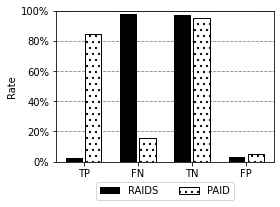

In [16]:
# advGAN
# TP, FN,TN,FP
labels = ["TP","FN","TN","FP"]
RAIDS = [0.02404809619238477,0.9759519038076152,0.9712999437253799,0.028700056274620148]
PAID = [0.8423513694054776,0.1576486305945224,0.9510410804727069,0.04895891952729319]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="k")
rects2 = ax.bar(x + width / 2, PAID, (width - 0.05), label="PAID", color="white", hatch="..", edgecolor="black")

ax.set_ylabel("Rate")
# ax.set_title("Evasion attack (advGAN)")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
ax.set_ylim([0, 1])
fig.set_size_inches(4, 3)
fig.tight_layout()
plt.show()
fig.savefig("report/RAIDS2_evasion_advGAN.pdf")

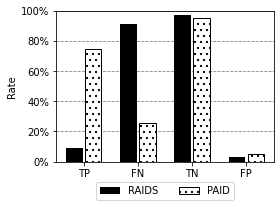

In [17]:
# advGANU
# TP, FN,TN,FP
labels = ["TP","FN","TN","FP"]
RAIDS = [0.08884435537742151,0.9111556446225785,0.9712999437253799,0.028700056274620148]
PAID = [0.7434869739478958,0.2565130260521042,0.95160382667417,0.04839617332583005]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, RAIDS, (width - 0.05), label="RAIDS", color="k")
rects2 = ax.bar(x + width / 2, PAID, (width - 0.05), label="PAID", color="white", hatch="..", edgecolor="black")

ax.set_ylabel("Rate")
# ax.set_title("Evasion attack (advGANU)")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(labels))
ax.set_ylim([0, 1])
fig.set_size_inches(4, 3)
fig.tight_layout()
plt.show()
fig.savefig("report/PAID_evasion_advGANU.pdf")

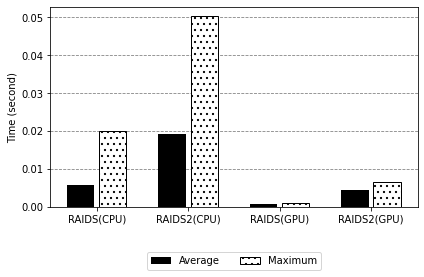

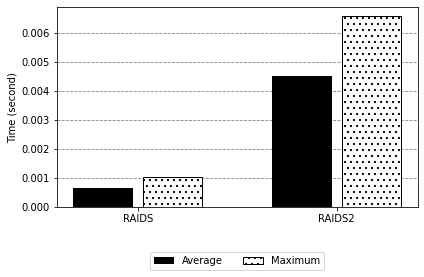

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ~~~~~~~~~~~~~~~~Response Time~~~~~~~~~~~~~~~~
# CPU with advGAN
labels = ["RAIDS(CPU)", "PAID(CPU)", "RAIDS(GPU)", "PAID(GPU)"]
Average = [0.005805, 0.019292, 0.000663, 0.004508]
Maximum = [0.019937, 0.050282,0.001018, 0.006572]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, Average, (width - 0.05), label="Average", color="k")
rects2 = ax.bar(x + width / 2, Maximum, (width - 0.05), label="Maximum", color="white", hatch="..", edgecolor="black")

ax.set_ylabel("Time (second)")
# ax.set_title("Abrupt Intrusion (2022)")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=len(labels))
# ax.set_ylim([0, 1])
fig.tight_layout()

plt.show()
fig.savefig("report/raids_response.pdf")

# GPU with advGAN
labels = ["RAIDS", "PAID"]
Average = [0.000663, 0.004508]
Maximum = [0.001018, 0.006572]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, Average, (width - 0.05), label="Average", color="k")
rects2 = ax.bar(x + width / 2, Maximum, (width - 0.05), label="Maximum", color="white", hatch="..", edgecolor="black")

ax.set_ylabel("Time (second)")
# ax.set_title("Directed Intrusion (2022)")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=len(labels))
# ax.set_ylim([0, 1])
fig.tight_layout()

plt.show()
# fig.savefig("report_image/raids_directed_response.pdf")

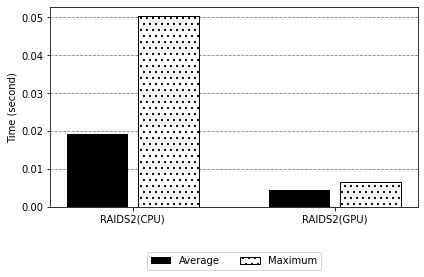

In [3]:
# ~~~~~~~~~~~~~~~~Response Time~~~~~~~~~~~~~~~~
# CPU with advGAN
labels = ["PAID(CPU)", "PAID(GPU)"]
Average = [ 0.019292, 0.004508]
Maximum = [ 0.050282, 0.006572]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, Average, (width - 0.05), label="Average", color="k")
rects2 = ax.bar(x + width / 2, Maximum, (width - 0.05), label="Maximum", color="white", hatch="..", edgecolor="black")

ax.set_ylabel("Time (second)")
# ax.set_title("Abrupt Intrusion (2022)")
ax.set_xticks(x, labels)
ax.set_axisbelow(True)
ax.yaxis.grid(color="gray", linestyle="dashed")
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=len(labels))
# ax.set_ylim([0, 1])
fig.tight_layout()

plt.show()
fig.savefig("report/raids2_response.pdf")